# FINAL PROJECT PART 4
MODEL BUILDING
### MULTILINEAR REGRESSION

   - The models I'm going to perform are:
        - Multilinear regression - Final Project part 4
        - Decission Tree Classifier - Final Project part 5
        - Random Forest - Final Project part 6
        - XGBOOST regression - Final project part 7

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split

%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)



import sys
sys.path.insert(0, '/Users/nuria/Documents/datasciencecourse/functions')
from Functions_EDA_ import *



In [2]:
happy_df=pd.read_csv('/Users/nuria/Documents/datasciencecourse/FINAL PROJECT/Happiness_df ready for ML.csv')

In [3]:
happy_df

,Unnamed: 0,Happines_score,GDP,Social_support,Life_exp_score,Freedom,Generosity,Gov_trust,Life_exp_age
0,0,7.5370,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,73.099998
1,1,7.5220,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,72.099998
2,2,7.5040,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,73.000000
3,3,7.4940,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,73.800003
4,4,7.4690,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,71.800003
...,...,...,...,...,...,...,...,...,...
615,615,3.4759,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,45.200001
616,616,3.3123,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,61.098846
617,617,3.2992,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,55.617260
618,618,2.8166,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,51.000000


In [4]:
happy_df.drop(columns='Unnamed: 0',inplace=True)

In [5]:
happy_df

,Happines_score,GDP,Social_support,Life_exp_score,Freedom,Generosity,Gov_trust,Life_exp_age
0,7.5370,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,73.099998
1,7.5220,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,72.099998
2,7.5040,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,73.000000
3,7.4940,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,73.800003
4,7.4690,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,71.800003
...,...,...,...,...,...,...,...,...
615,3.4759,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,45.200001
616,3.3123,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,61.098846
617,3.2992,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,55.617260
618,2.8166,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,51.000000


##### Option 1:

In [6]:
SEED = 7
np.random.seed(SEED)

In [7]:
from pandas import set_option
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

### OPTION 1: MULTILINEAR REGRESSION

OPTION 1.1. 
    - RAW DATA
    - WITHOUT TREATING OUTLIERS
    - DATA NOT SCALED

In [8]:
#GET THE TARGET VARIABLE
y=happy_df.Life_exp_age
X=happy_df.drop(columns='Life_exp_age')

In [9]:
#SPLIT THE DATA 
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [10]:
#INSTANTIATE THE MODEL
from sklearn.linear_model import LinearRegression

mReg=LinearRegression()

In [11]:
#fit the model with the training set

mReg.fit(X_train, y_train)

LinearRegression()

In [12]:
# Intercept of the model
print("Intercept of the lineal model",mReg.intercept_)

Intercept of the lineal model 46.77913470340308


In [13]:
#Coefficients of the model
print("The coefficient for the model are:", mReg.coef_)

The coefficient for the model are: [-0.08255721  4.44743704  0.11501201 20.56506079 -0.72374864  4.05213238
  2.72001315]


In [14]:
# Evaluation of the model

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import r2_score

In [16]:
#dataframe where I'm going to store all the metrics for my models

def print_score(clf, X_train, y_train, X_test, y_test,train=True):
    """
    Function created to evaluate the performance of the model, calculating MAE, MSE, RMSE and R2
    inputs: clf-> model to assess
            X_train, X_test
            y_train, y_test
            train -> Boolean index. If True just show the results regarding the TRAIN set, if False show TEST
    """
    
    
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n===========================================")
        MAE_train = metrics.mean_absolute_error(y_train, pred)
        MSE_train = metrics.mean_squared_error(y_train, pred)
        RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, pred))
        R2_train = r2_score(y_train, pred)
        
        print(f"MAE: {MAE_train:.4f}\n")
        print(f"MSE: {MSE_train:.4f}\n")
        print(f"RMSE: {RMSE_train:.4f}\n")
        print(f"R^2: {R2_train:.4f}\n")
        print('================================================================')
        cv_scores = cross_val_score(clf, X_train, 
                            y_train,cv=10, scoring='r2') # Let's define the K and the 

        print('Cross Validation R2_score for train set: {}'.format(cv_scores.round(2)))
        print("\nAverage 10-Fold CV R2_score for train set: {}".format(np.mean(cv_scores).round(3)))
        print()   
        
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n===========================================")        
        MAE_test = metrics.mean_absolute_error(y_test, pred)
        MSE_test = metrics.mean_squared_error(y_test, pred)
        RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, pred))
        R2_test = r2_score(y_test, pred)
        
        print(f"MAE: {MAE_test:.4f}\n")
        print(f"MSE: {MSE_test:.4f}\n")
        print(f"RMSE: {RMSE_test:.4f}\n")
        print(f"R^2: {R2_test:.4f}\n")
        
        cv_scores2 = cross_val_score(clf, X_test, 
                            y_test,cv=10, scoring='r2')
        print('Cross Validation R2_score for test set: {}'.format(cv_scores2.round(2)))
        print("\nAverage 10-Fold CV R2_score for test set: {}".format(np.mean(cv_scores2).round(3)))
        print()
        
        

In [17]:
print_score(mReg, X_train, y_train, X_test, y_test, train=True)
print_score(mReg, X_train, y_train, X_test, y_test, train=False)


Train Result:
MAE: 1.6637

MSE: 5.3413

RMSE: 2.3111

R^2: 0.8960

Cross Validation R2_score for train set: [0.87 0.92 0.9  0.89 0.9  0.88 0.89 0.94 0.85 0.8 ]

Average 10-Fold CV R2_score for train set: 0.885

Test Result:
MAE: 1.6438

MSE: 5.5438

RMSE: 2.3545

R^2: 0.8817

Cross Validation R2_score for test set: [0.64 0.89 0.93 0.78 0.89 0.96 0.92 0.9  0.85 0.91]

Average 10-Fold CV R2_score for test set: 0.868



In [18]:
#Check the range for the target variable to see the if the MAE is hight or not
print("Max. value for the target variable:",y.max())
print("Min. value for the target variable:",round(y.min(),2))

Max. value for the target variable: 80.16
Min. value for the target variable: 45.2


In [19]:
y_pred=mReg.predict(X_test)

In [20]:
df_result=pd.DataFrame({'Real_Value':y_test,'Predicted_value_LR':y_pred})
df_result

,Real_Value,Predicted_value_LR
49,74.180000,60.547202
584,66.006149,67.769890
82,68.300003,66.102487
305,61.099998,57.861212
109,63.799999,60.746936
...,...,...
182,66.400002,65.013604
495,64.808945,64.771538
411,67.000000,67.520169
18,72.099998,71.721267


OPTION 1.2. 
    - TARGET VARIABLE TRANFORMED WITH LOGARITMIC, this variable is a little skewned and it 
      can improve its result
    - WITHOUT TREATING OUTLIERS
    - DATA NOT SCALED

In [21]:
#GET THE TARGET VARIABLE
y=happy_df.Life_exp_age
X=happy_df.drop(columns='Life_exp_age')

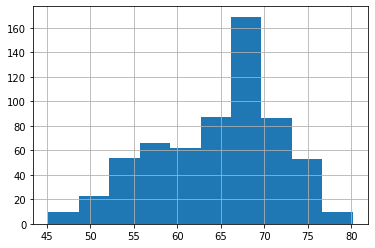

In [22]:
y.hist()

In [23]:
# Log transformation of the target variable
from sklearn.preprocessing import StandardScaler

y=np.log(y)

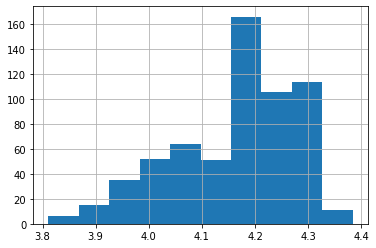

In [24]:
y.hist()

In [25]:
#split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [26]:
#instantitate the model
mReg=LinearRegression()

In [27]:
mReg.fit(X_train, y_train)

LinearRegression()

In [28]:
print("Intercept of the lineal model",mReg.intercept_)
print("The coefficient for the model are:", mReg.coef_)

Intercept of the lineal model 3.8738414919555453
The coefficient for the model are: [-0.00359458  0.06614241  0.00943286  0.34375704 -0.0033148   0.06644351
  0.02019744]


In [29]:
print_score(mReg, X_train, y_train, X_test, y_test, train=True)
print_score(mReg, X_train, y_train, X_test, y_test, train=False)

Train Result:
MAE: 0.0276

MSE: 0.0015

RMSE: 0.0382

R^2: 0.8915

Cross Validation R2_score for train set: [0.87 0.91 0.9  0.87 0.89 0.87 0.89 0.94 0.86 0.8 ]

Average 10-Fold CV R2_score for train set: 0.88

Test Result:
MAE: 0.0267

MSE: 0.0015

RMSE: 0.0381

R^2: 0.8781

Cross Validation R2_score for test set: [0.63 0.9  0.93 0.8  0.89 0.95 0.91 0.9  0.86 0.9 ]

Average 10-Fold CV R2_score for test set: 0.867



In [30]:
y_pred=mReg.predict(X_test)

In [31]:
# Reverse the log transformation with exponential
y_pred_exp=np.exp(y_pred)
y_test_exp=np.exp(y_test)

In [32]:
df_results2=pd.DataFrame({'Real_Value_LR_logy':y_test_exp,'Predicted_value_LR_logy':y_pred_exp})
df_results2

,Real_Value_LR_logy,Predicted_value_LR_logy
49,74.180000,59.951064
584,66.006149,67.441929
82,68.300003,65.666076
305,61.099998,57.377559
109,63.799999,60.260718
...,...,...
182,66.400002,64.675104
495,64.808945,64.440507
411,67.000000,67.488002
18,72.099998,71.695969


In [33]:
def concat_results(dataframe1, dataframe2):
    dataframe_concat=pd.DataFrame()
    dataframe_concat=pd.concat([dataframe1, dataframe2], axis=1, sort=False)
    return dataframe_concat

In [34]:
results_comp=concat_results(df_result,df_results2)

In [35]:
results_comp

,Real_Value,Predicted_value_LR,Real_Value_LR_logy,Predicted_value_LR_logy
49,74.180000,60.547202,74.180000,59.951064
584,66.006149,67.769890,66.006149,67.441929
82,68.300003,66.102487,68.300003,65.666076
305,61.099998,57.861212,61.099998,57.377559
109,63.799999,60.746936,63.799999,60.260718
...,...,...,...,...
182,66.400002,65.013604,66.400002,64.675104
495,64.808945,64.771538,64.808945,64.440507
411,67.000000,67.520169,67.000000,67.488002
18,72.099998,71.721267,72.099998,71.695969


OPTION 1.3. 
    - MIN MAX SCALER IN THE NON TARGET VARIABLES
    - WITHOUT TREATING OUTLIERS
    - TARGET VARIABLE NOT SCALED

In [36]:
y=happy_df.Life_exp_age
X=happy_df.drop(columns='Life_exp_age')

In [37]:
#Transform the non target variable using MinMaxScaler 

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [39]:
X_scaled=scaler.fit_transform(X)

In [40]:
#split the data
X_train, X_test, y_train, y_test=train_test_split(X_scaled,y,test_size=0.33,random_state=42)

In [41]:
#instantiate the model
mReg=LinearRegression()

In [42]:
mReg.fit(X_train, y_train)

LinearRegression()

In [43]:
print("Intercept of the lineal model",mReg.intercept_)
print("The coefficient for the model are:", mReg.coef_)

Intercept of the lineal model 46.56721860007475
The coefficient for the model are: [-0.43274839  9.32182804  0.18907974 23.46473436 -0.52399401  3.39599149
  1.4502083 ]


In [44]:
print_score(mReg, X_train, y_train, X_test, y_test, train=True)
print_score(mReg, X_train, y_train, X_test, y_test, train=False)

Train Result:
MAE: 1.6637

MSE: 5.3413

RMSE: 2.3111

R^2: 0.8960

Cross Validation R2_score for train set: [0.87 0.92 0.9  0.89 0.9  0.88 0.89 0.94 0.85 0.8 ]

Average 10-Fold CV R2_score for train set: 0.885

Test Result:
MAE: 1.6438

MSE: 5.5438

RMSE: 2.3545

R^2: 0.8817

Cross Validation R2_score for test set: [0.64 0.89 0.93 0.78 0.89 0.96 0.92 0.9  0.85 0.91]

Average 10-Fold CV R2_score for test set: 0.868



In [45]:
y_pred=mReg.predict(X_test)

In [46]:
df_results3=pd.DataFrame({'Real_Value_LR_minmax':y_test,'Predicted_value_LR_minmax':y_pred})
df_results3

,Real_Value_LR_minmax,Predicted_value_LR_minmax
49,74.180000,60.547202
584,66.006149,67.769890
82,68.300003,66.102487
305,61.099998,57.861212
109,63.799999,60.746936
...,...,...
182,66.400002,65.013604
495,64.808945,64.771538
411,67.000000,67.520169
18,72.099998,71.721267


In [47]:
results_comp=concat_results(results_comp,df_results3)
results_comp

,Real_Value,Predicted_value_LR,Real_Value_LR_logy,Predicted_value_LR_logy,Real_Value_LR_minmax,Predicted_value_LR_minmax
49,74.180000,60.547202,74.180000,59.951064,74.180000,60.547202
584,66.006149,67.769890,66.006149,67.441929,66.006149,67.769890
82,68.300003,66.102487,68.300003,65.666076,68.300003,66.102487
305,61.099998,57.861212,61.099998,57.377559,61.099998,57.861212
109,63.799999,60.746936,63.799999,60.260718,63.799999,60.746936
...,...,...,...,...,...,...
182,66.400002,65.013604,66.400002,64.675104,66.400002,65.013604
495,64.808945,64.771538,64.808945,64.440507,64.808945,64.771538
411,67.000000,67.520169,67.000000,67.488002,67.000000,67.520169
18,72.099998,71.721267,72.099998,71.695969,72.099998,71.721267


OPTION 1.4.

I can see that transforming the data we don't get better results. In this next step I'm going to apply Lasso and Ridge regression to see if we can improve the performance

- RIDGE REGRESSION
- WITHOUT TREATING OUTLIERS
- RAW DATA

In [48]:
y=happy_df.Life_exp_age
X=happy_df.drop(columns='Life_exp_age')

In [49]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [50]:
from sklearn.linear_model import Ridge
mReg_ridge=Ridge()

In [51]:
from sklearn.model_selection import GridSearchCV
parameters={'alpha':[1,5,10,20,100]}
ridge_reg=GridSearchCV(mReg_ridge,parameters,scoring='neg_mean_squared_error',cv=5)

In [52]:
ridge_reg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [1, 5, 10, 20, 100]},
             scoring='neg_mean_squared_error')

In [53]:
ridge_reg.best_params_

{'alpha': 1}

In [54]:
parameters={'alpha':[0.1,0.25,0.5,0.75,1,2]}
ridge_reg=GridSearchCV(mReg_ridge,parameters,scoring='neg_mean_squared_error',cv=5)

In [55]:
ridge_reg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 0.25, 0.5, 0.75, 1, 2]},
             scoring='neg_mean_squared_error')

In [56]:
ridge_reg.best_params_

{'alpha': 0.1}

In [57]:
parameters={'alpha':[0.00001,0.0001,0.0001,0.001,0.01,0.1]}
ridge_reg=GridSearchCV(mReg_ridge,parameters,scoring='neg_mean_squared_error',cv=5)

In [58]:
ridge_reg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0001, 0.001, 0.01, 0.1]},
             scoring='neg_mean_squared_error')

In [59]:
ridge_reg.best_params_

{'alpha': 0.1}

In [60]:
parameters={'alpha':[0.1]}
ridge_reg=GridSearchCV(mReg_ridge,parameters,scoring='neg_mean_squared_error',cv=5)

In [61]:
ridge_reg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.1]},
             scoring='neg_mean_squared_error')

In [62]:
print_score(ridge_reg, X_train, y_train, X_test, y_test, train=True)
print_score(ridge_reg, X_train, y_train, X_test, y_test, train=False)

Train Result:
MAE: 1.6630

MSE: 5.3424

RMSE: 2.3114

R^2: 0.8960

Cross Validation R2_score for train set: [0.87 0.92 0.9  0.89 0.9  0.88 0.89 0.94 0.85 0.8 ]

Average 10-Fold CV R2_score for train set: 0.885

Test Result:
MAE: 1.6394

MSE: 5.5248

RMSE: 2.3505

R^2: 0.8821

Cross Validation R2_score for test set: [0.64 0.89 0.93 0.78 0.89 0.96 0.92 0.91 0.85 0.91]

Average 10-Fold CV R2_score for test set: 0.869



In [63]:
y_pred=ridge_reg.predict(X_test)

In [64]:
df_results4=pd.DataFrame({'Real_Value_Ridge':y_test,'Predicted_value_Ridge':y_pred})
df_results4

,Real_Value_Ridge,Predicted_value_Ridge
49,74.180000,60.603196
584,66.006149,67.721506
82,68.300003,66.097093
305,61.099998,57.817265
109,63.799999,60.741589
...,...,...
182,66.400002,65.049258
495,64.808945,64.788504
411,67.000000,67.475222
18,72.099998,71.702818


In [65]:
results_comp=concat_results(results_comp,df_results4)
results_comp

,Real_Value,Predicted_value_LR,Real_Value_LR_logy,Predicted_value_LR_logy,Real_Value_LR_minmax,Predicted_value_LR_minmax,Real_Value_Ridge,Predicted_value_Ridge
49,74.180000,60.547202,74.180000,59.951064,74.180000,60.547202,74.180000,60.603196
584,66.006149,67.769890,66.006149,67.441929,66.006149,67.769890,66.006149,67.721506
82,68.300003,66.102487,68.300003,65.666076,68.300003,66.102487,68.300003,66.097093
305,61.099998,57.861212,61.099998,57.377559,61.099998,57.861212,61.099998,57.817265
109,63.799999,60.746936,63.799999,60.260718,63.799999,60.746936,63.799999,60.741589
...,...,...,...,...,...,...,...,...
182,66.400002,65.013604,66.400002,64.675104,66.400002,65.013604,66.400002,65.049258
495,64.808945,64.771538,64.808945,64.440507,64.808945,64.771538,64.808945,64.788504
411,67.000000,67.520169,67.000000,67.488002,67.000000,67.520169,67.000000,67.475222
18,72.099998,71.721267,72.099998,71.695969,72.099998,71.721267,72.099998,71.702818


OPTION 1.5.

-LASSO REGRESSION  
-WITHOUT TREATING OUTLIERS   
-RAW DATA  

In [66]:
y=happy_df.Life_exp_age
X=happy_df.drop(columns='Life_exp_age')

In [67]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [68]:
from sklearn.linear_model import Lasso
mReg_lasso=Lasso()

In [69]:
parameters={'alpha':[0.00001,0.0001,0.0001,0.001,0.01,0.1,0.25,0.5,0.75,1,5,10,20,100]}
lasso_reg=GridSearchCV(mReg_lasso,parameters,scoring='neg_mean_squared_error',cv=5)

In [70]:
lasso_reg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0001, 0.001, 0.01, 0.1,
                                   0.25, 0.5, 0.75, 1, 5, 10, 20, 100]},
             scoring='neg_mean_squared_error')

In [71]:
lasso_reg.best_params_

{'alpha': 0.01}

In [72]:
parameters={'alpha':[0.01]}
lasso_reg=GridSearchCV(mReg_lasso,parameters,scoring='neg_mean_squared_error',cv=5)

In [73]:
lasso_reg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [0.01]},
             scoring='neg_mean_squared_error')

In [74]:
print_score(lasso_reg, X_train, y_train, X_test, y_test, train=True)
print_score(lasso_reg, X_train, y_train, X_test, y_test, train=False)

Train Result:
MAE: 1.6487

MSE: 5.3686

RMSE: 2.3170

R^2: 0.8954

Cross Validation R2_score for train set: [0.87 0.93 0.91 0.89 0.9  0.88 0.89 0.94 0.85 0.81]

Average 10-Fold CV R2_score for train set: 0.886

Test Result:
MAE: 1.6250

MSE: 5.4378

RMSE: 2.3319

R^2: 0.8839

Cross Validation R2_score for test set: [0.64 0.89 0.93 0.78 0.88 0.96 0.92 0.91 0.86 0.91]

Average 10-Fold CV R2_score for test set: 0.869



In [75]:
y_pred=lasso_reg.predict(X_test)

In [76]:
df_results5=pd.DataFrame({'Real_Value_Lasso':y_test,'Predicted_value_Lasso':y_pred})
df_results5

,Real_Value_Lasso,Predicted_value_Lasso
49,74.180000,60.761295
584,66.006149,67.524233
82,68.300003,65.946420
305,61.099998,57.572981
109,63.799999,60.824182
...,...,...
182,66.400002,65.208360
495,64.808945,65.011466
411,67.000000,67.432745
18,72.099998,71.388997


In [77]:
results_comp=concat_results(results_comp,df_results5)
results_comp

,Real_Value,Predicted_value_LR,Real_Value_LR_logy,Predicted_value_LR_logy,Real_Value_LR_minmax,Predicted_value_LR_minmax,Real_Value_Ridge,Predicted_value_Ridge,Real_Value_Lasso,Predicted_value_Lasso
49,74.180000,60.547202,74.180000,59.951064,74.180000,60.547202,74.180000,60.603196,74.180000,60.761295
584,66.006149,67.769890,66.006149,67.441929,66.006149,67.769890,66.006149,67.721506,66.006149,67.524233
82,68.300003,66.102487,68.300003,65.666076,68.300003,66.102487,68.300003,66.097093,68.300003,65.946420
305,61.099998,57.861212,61.099998,57.377559,61.099998,57.861212,61.099998,57.817265,61.099998,57.572981
109,63.799999,60.746936,63.799999,60.260718,63.799999,60.746936,63.799999,60.741589,63.799999,60.824182
...,...,...,...,...,...,...,...,...,...,...
182,66.400002,65.013604,66.400002,64.675104,66.400002,65.013604,66.400002,65.049258,66.400002,65.208360
495,64.808945,64.771538,64.808945,64.440507,64.808945,64.771538,64.808945,64.788504,64.808945,65.011466
411,67.000000,67.520169,67.000000,67.488002,67.000000,67.520169,67.000000,67.475222,67.000000,67.432745
18,72.099998,71.721267,72.099998,71.695969,72.099998,71.721267,72.099998,71.702818,72.099998,71.388997


OPTION 1.6.

I can see that transforming the data we don't get better results. In this next step I'm going to apply Lasso and Ridge regression to see if we can improve the performance

- LASSO REGRESSION
- WITHOUT TREATING OUTLIERS
- TARGET VARIABLE LOG TRANSFORMED

In [78]:
y=happy_df.Life_exp_age
X=happy_df.drop(columns='Life_exp_age')

In [79]:
# LOG transform for the target variable

In [80]:
y=np.log(y)

In [81]:
#split the data

In [82]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [83]:
#instantiate the model
mReg_lasso=Lasso()

In [84]:
parameters={'alpha':[0.00001,0.0001,0.0001,0.001,0.01,0.1,0.25,0.5,0.75,1,5,10,20,100]}
lasso_reg=GridSearchCV(mReg_lasso,parameters,scoring='neg_mean_squared_error',cv=5)

In [85]:
lasso_reg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0001, 0.001, 0.01, 0.1,
                                   0.25, 0.5, 0.75, 1, 5, 10, 20, 100]},
             scoring='neg_mean_squared_error')

In [86]:
lasso_reg.best_params_

{'alpha': 0.0001}

In [87]:
parameters={'alpha':[0.0001]}
lasso_reg=GridSearchCV(mReg_lasso,parameters,scoring='neg_mean_squared_error',cv=5)

In [88]:
lasso_reg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [0.0001]},
             scoring='neg_mean_squared_error')

In [89]:
print_score(lasso_reg, X_train, y_train, X_test, y_test, train=True)
print_score(lasso_reg, X_train, y_train, X_test, y_test, train=False)

Train Result:
MAE: 0.0275

MSE: 0.0015

RMSE: 0.0383

R^2: 0.8913

Cross Validation R2_score for train set: [0.87 0.91 0.9  0.87 0.9  0.87 0.89 0.94 0.86 0.8 ]

Average 10-Fold CV R2_score for train set: 0.881

Test Result:
MAE: 0.0266

MSE: 0.0014

RMSE: 0.0380

R^2: 0.8792

Cross Validation R2_score for test set: [0.63 0.9  0.93 0.8  0.89 0.95 0.92 0.9  0.86 0.9 ]

Average 10-Fold CV R2_score for test set: 0.867



In [90]:
# we are not getting better results
y_pred=lasso_reg.predict(X_test)

In [91]:
y_pred_exp=np.exp(y_pred)
y_test_exp=np.exp(y_test)

In [92]:
df_results6=pd.DataFrame({'Real_Value_Lasso':y_test_exp,'Predicted_value_Lasso_logy':y_pred_exp})
df_results6

,Real_Value_Lasso,Predicted_value_Lasso_logy
49,74.180000,60.135652
584,66.006149,67.322461
82,68.300003,65.602803
305,61.099998,57.073331
109,63.799999,60.343653
...,...,...
182,66.400002,64.805877
495,64.808945,64.640835
411,67.000000,67.380910
18,72.099998,71.473722


In [93]:
results_comp=concat_results(results_comp,df_results6)
results_comp

,Real_Value,Predicted_value_LR,Real_Value_LR_logy,Predicted_value_LR_logy,Real_Value_LR_minmax,Predicted_value_LR_minmax,Real_Value_Ridge,Predicted_value_Ridge,Real_Value_Lasso,Predicted_value_Lasso,Real_Value_Lasso,Predicted_value_Lasso_logy
49,74.180000,60.547202,74.180000,59.951064,74.180000,60.547202,74.180000,60.603196,74.180000,60.761295,74.180000,60.135652
584,66.006149,67.769890,66.006149,67.441929,66.006149,67.769890,66.006149,67.721506,66.006149,67.524233,66.006149,67.322461
82,68.300003,66.102487,68.300003,65.666076,68.300003,66.102487,68.300003,66.097093,68.300003,65.946420,68.300003,65.602803
305,61.099998,57.861212,61.099998,57.377559,61.099998,57.861212,61.099998,57.817265,61.099998,57.572981,61.099998,57.073331
109,63.799999,60.746936,63.799999,60.260718,63.799999,60.746936,63.799999,60.741589,63.799999,60.824182,63.799999,60.343653
...,...,...,...,...,...,...,...,...,...,...,...,...
182,66.400002,65.013604,66.400002,64.675104,66.400002,65.013604,66.400002,65.049258,66.400002,65.208360,66.400002,64.805877
495,64.808945,64.771538,64.808945,64.440507,64.808945,64.771538,64.808945,64.788504,64.808945,65.011466,64.808945,64.640835
411,67.000000,67.520169,67.000000,67.488002,67.000000,67.520169,67.000000,67.475222,67.000000,67.432745,67.000000,67.380910
18,72.099998,71.721267,72.099998,71.695969,72.099998,71.721267,72.099998,71.702818,72.099998,71.388997,72.099998,71.473722


In [ ]:
# GET THE BEST PREDICTION , for the presentatition

In [102]:
ml_regression_lasso=results_comp[['Real_Value','Predicted_value_Lasso']]

In [103]:
ml_regression_lasso

,Real_Value,Predicted_value_Lasso
49,74.180000,60.761295
584,66.006149,67.524233
82,68.300003,65.946420
305,61.099998,57.572981
109,63.799999,60.824182
...,...,...
182,66.400002,65.208360
495,64.808945,65.011466
411,67.000000,67.432745
18,72.099998,71.388997


In [104]:
ml_regression_lasso.to_csv('best ml_regression.csv',index=False)